Linear regressions can be used as a method of calibrating by the difference between two datasets.

In [70]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

<Axes: >

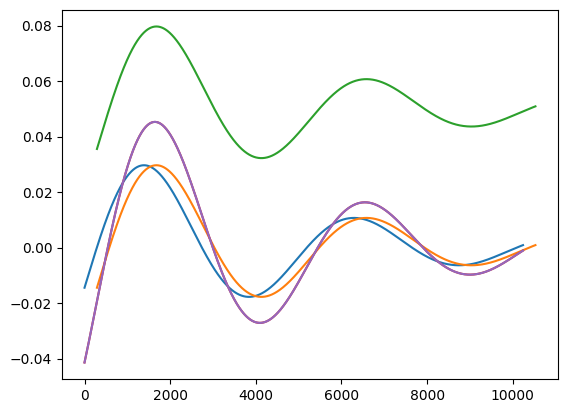

In [71]:
# Generate some 'interesting' data with more variation from population set
shift = 290 # Address phase shift of dataset
bias = 0.05 # Artificial bias introduced into sense for testing

sense = pd.read_csv('sensor.circuitjs.csv')

reference = pd.read_csv('output.circuitjs.csv')
reference.columns, sense.columns = ['ref'],['sense']

sense['sense'].plot()

# Correct phase shift
sense.index = np.arange(shift,shift+len(sense))
sense['sense'].plot()

# Introduce artificial bias
sense['sense'] += bias
sense['sense'].plot()

data = pd.DataFrame({'ref':reference['ref'],'sense':sense['sense']})
data['ref'].plot()
data['ref'].plot()



<Axes: >

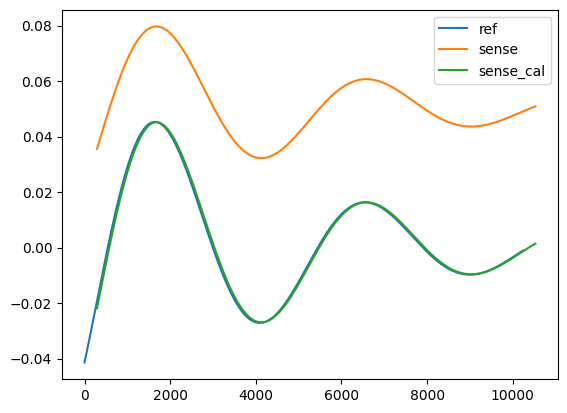

In [72]:
x = np.array(data['sense'])[shift:-shift]
y = np.array(data['ref'])[shift:-shift]

order = 1

coeffs, residuals, _, _, _ = np.polyfit(x, y, order, full=True)
coeffs

data['sense_cal'] = data['sense']*coeffs[0] + coeffs[1]
data.plot()